# House Unit Price Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_excel("Real estate valuation data set.xlsx")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Splitting dataset for training and testing

In [32]:
from sklearn.model_selection import train_test_split

y = data['Y house price of unit area'].values
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
X = data[features].values

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)

In [33]:
print(X)
print(y)

[[ 32.       84.87882  10.     ]
 [ 19.5     306.5947    9.     ]
 [ 13.3     561.9845    5.     ]
 ...
 [ 18.8     390.9696    7.     ]
 [  8.1     104.8101    5.     ]
 [  6.5      90.45606   9.     ]]
[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5

# Plotting Correlation

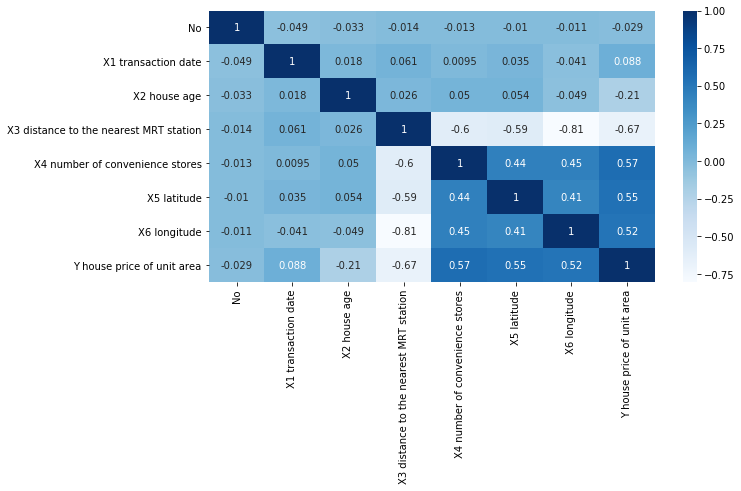

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap='Blues', annot = True)

# Checking for Null Values

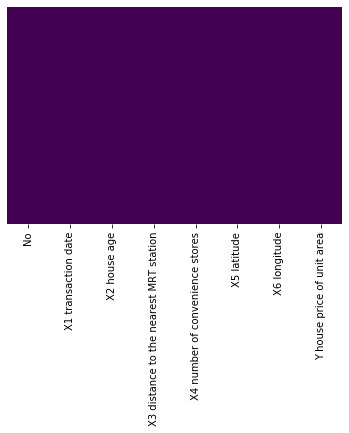

In [35]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Linear Regression Model

In [36]:
from sklearn import linear_model
lmodel = linear_model.LinearRegression()
lmodel.fit(train_X,train_y)
ypredict = lmodel.predict(val_X)
print(ypredict[:5])
print(val_y[:5])

[33.49167831 48.92197136 24.362527   17.60560953 42.37845974]
[27.3 54.4 22.  11.6 45.4]


# Mean Absolute Error

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ypredict,val_y)
print(mae)

5.895169093420211


# Plotting Actual vs Prediction

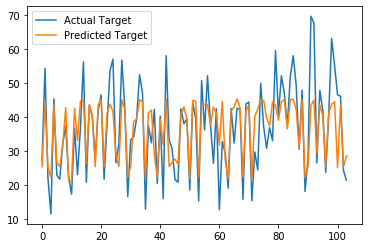

In [53]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(ypredict, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()

# Support Vector Regression

In [39]:
from sklearn.svm import SVR
svmodel = SVR(C=1, kernel='rbf', degree = 2)
svmodel.fit(train_X,train_y)
ypredict = svmodel.predict(val_X)
print(ypredict[:5])
print(val_y[:5])

[25.47703091 44.48983036 25.32898257 22.33877712 43.73303773]
[27.3 54.4 22.  11.6 45.4]


# Mean Absolute Error

In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ypredict,val_y)
print(mae)

6.165508616716355


# Plotting Actual vs Prediction

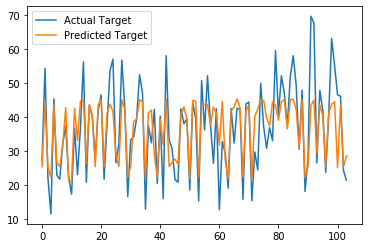

In [54]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(ypredict, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()

# Actual Values and Predicted Values

In [42]:
for p,q in zip(val_y[:10],ypredict[:10]):
    print(p,'<-->',q)

27.3 <--> 25.47703090673644
54.4 <--> 44.48983036127765
22.0 <--> 25.328982565921613
11.6 <--> 22.338777123488352
45.4 <--> 43.73303773091847
23.0 <--> 26.727897181014363
21.8 <--> 25.504145645135218
32.2 <--> 31.726874492321656
37.4 <--> 42.89116297927995
22.6 <--> 21.14920390975489


# BayesianRidge Regression

In [43]:
from sklearn.linear_model import BayesianRidge
brmodel = BayesianRidge(compute_score = True)
brmodel.fit(train_X,train_y)

predict_y = svmodel.predict(val_X)
print(val_y[:5])
print(predict_y[:5])

[27.3 54.4 22.  11.6 45.4]
[25.47703091 44.48983036 25.32898257 22.33877712 43.73303773]


# Mean Absolute Error

In [44]:
mae = mean_absolute_error(ypredict,val_y)
print(mae)

6.165508616716355


# Actual Values and Predicted Values

In [45]:
output = pd.DataFrame({'Actual Price': val_y,'Predicted Price': predict_y})
print(output.head())

   Actual Price  Predicted Price
0          27.3        25.477031
1          54.4        44.489830
2          22.0        25.328983
3          11.6        22.338777
4          45.4        43.733038


# Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(random_state = 1)
rfmodel.fit(train_X,train_y)

predict_y = rfmodel.predict(val_X)
print(val_y[:5])
print(predict_y[:5])

[27.3 54.4 22.  11.6 45.4]
[25.64       47.7319     28.842      15.1108     59.04773452]


# Plotting Actual vs Prediction

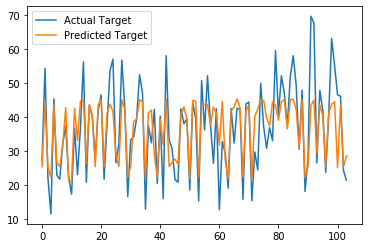

In [55]:
plt.plot(val_y, label = 'Actual Target')
plt.plot(ypredict, label = 'Predicted Target')
plt.legend(loc = 'upper left')

plt.show()

# Mean Absolute Error

In [48]:
mae = mean_absolute_error(ypredict,val_y)
print(mae)

6.165508616716355


# Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor(random_state = 1)

dtmodel.fit(train_X,train_y)

predict_y = dtmodel.predict(val_X)
print(val_y[:5])
print(predict_y[:5])

[27.3 54.4 22.  11.6 45.4]
[23.9        47.56666667 24.7        12.9        33.6       ]


# Mean Absolute Error

In [50]:
mae = mean_absolute_error(ypredict,val_y)
print(mae)

6.165508616716355


# Optimum max_leaf_nodes 

In [51]:
def dtmod(max_leaf,x,y,X,Y):
    dtrmodel = DecisionTreeRegressor(max_leaf_nodes = max_leaf, random_state = 1)
    dtrmodel.fit(x,y)
    predict_y = dtmodel.predict(X)
    mae = mean_absolute_error(ypredict,Y)
    return mae

In [52]:
for i in  [5, 10, 50, 100, 250]:
    getmea = dtmod(i, train_X,train_y,val_X,val_y)
    print(f"mea= {getmea} node= {i}")

mea= 6.165508616716355 node= 5
mea= 6.165508616716355 node= 10
mea= 6.165508616716355 node= 50
mea= 6.165508616716355 node= 100
mea= 6.165508616716355 node= 250
